In [90]:
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from scipy.spatial import distance
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [54]:
def dataExt(model, optimizer):
    # Load feature ext Data
    filesTrain = "./imgNames/train_data_names.pkl"
    filesTest = "./imgNames/test_data_names.pkl"
    pathTrain = "./" + model + "_features/" + model + "_" + optimizer + "_train.npy"
    pathTest = "./" + model + "_features/" + model + "_" + optimizer + "_test.npy"
    
    # unload pickle the file names
    with open(filesTrain,'rb') as f:
        file_train_list = np.load(f, allow_pickle=True)
        
    with open(filesTest,'rb') as f:
        file_test_list = np.load(f, allow_pickle=True)
    # data preprocessing 
    file_train_list = [i[18:] for i in file_train_list]
    file_test_list = [i[17:] for i in file_test_list]
    
    feat_train_np = np.load(pathTrain)
    feat_test_np = np.load(pathTest)
    # return all the data of features of specific model
    return file_train_list, file_test_list, feat_train_np, feat_test_np

# Logistic Regression

In [105]:
def LogReg(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)    
    # extract data using function made above
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
    #data preprocessing
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    #actual model of logistic regression from sklearn library
    Model = LogisticRegression()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    # check the accuracy p, r,f
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

# Random Forest

In [135]:
def RandFor(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = RandomForestClassifier()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

# Linear SVM

In [136]:
def LinearSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Linear SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='linear') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

# Rbf SVM

In [137]:
def RbfSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("RBF SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

# Sigmoid SVM

In [138]:
def SigmoidSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Sigmoid SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='sigmoid') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

# Poly SVM

In [156]:
def PolySVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("POLY SVM", model, optimizer)    
    
    a,b,c,d = dataExt(model, optimizer)
    
    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
       
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)
    
    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)
    
    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    
    Model = svm.SVC(kernel='poly') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

# Logistic Regression Test

Logistic Regression VGG16 Adam
Acuracy 0.9852125693160814
P,R,F1: (0.9789699544725058, 0.9880954234122042, 0.9833187461245967, None)


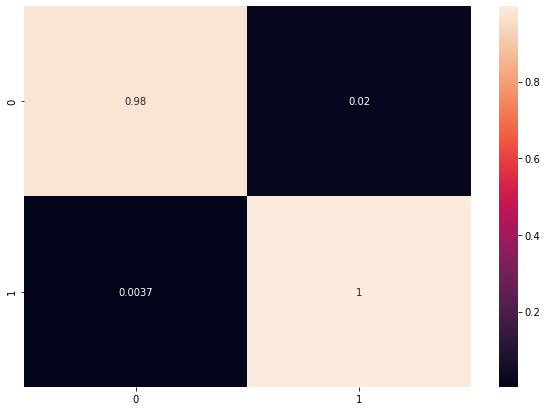

In [111]:
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('VGG16', 'Adam', X_train, y_train, X_test, y_test)

Logistic Regression VGG16 RMSprop
Acuracy 0.9887773963559546
P,R,F1: (0.9836940849379218, 0.9911676438841122, 0.9872925871977835, None)
Wall time: 7.22 s


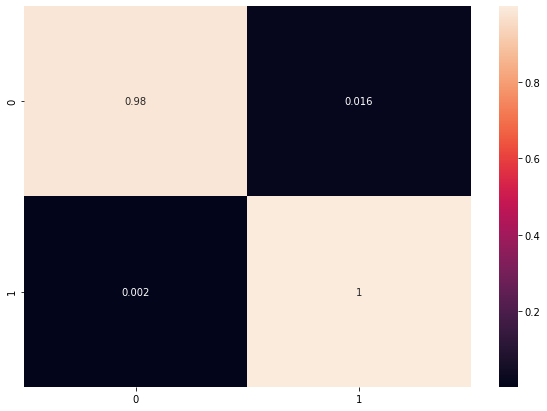

In [112]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adam
Acuracy 0.889754423026142
P,R,F1: (0.8698896149153024, 0.8929337148714445, 0.8790105730230018, None)
Wall time: 8.48 s


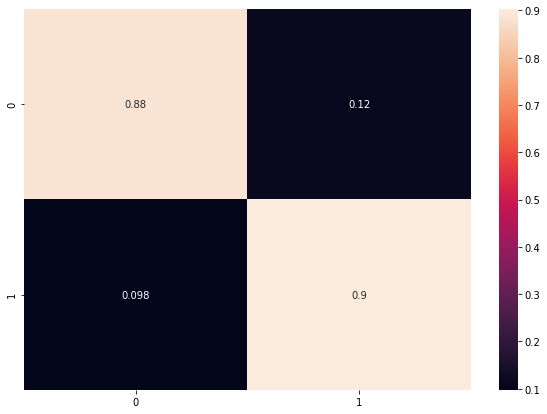

In [113]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adagrad
Acuracy 0.992078162133615
P,R,F1: (0.9883348009472674, 0.9939104730620203, 0.9910455687624418, None)
Wall time: 7.39 s


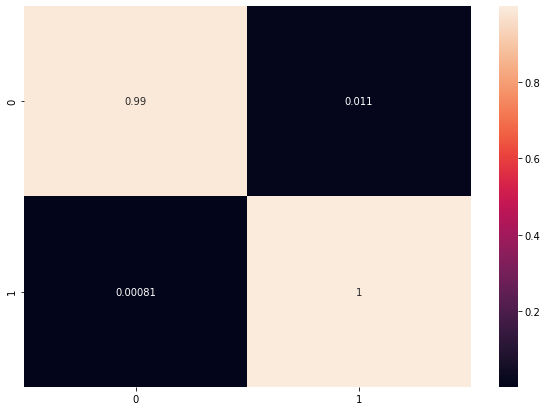

In [114]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LogReg('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

# Random Forest

Logistic Regression VGG16 Adam
Acuracy 0.9900977026670188
P,R,F1: (0.9851308485329104, 0.9926857811585723, 0.9887691544931951, None)
Wall time: 12.5 s


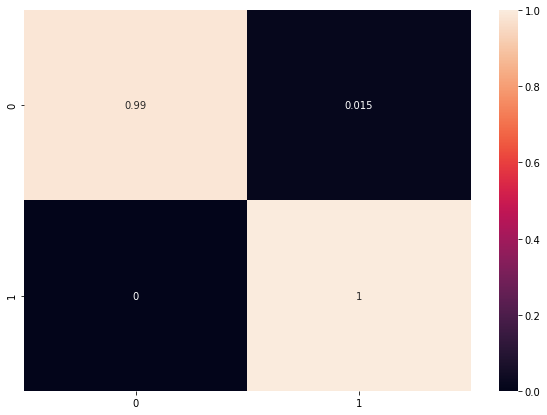

In [115]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('VGG16','Adam', X_train, y_train, X_test, y_test)

Logistic Regression VGG16 RMSprop
Acuracy 0.9911539477158701
P,R,F1: (0.9868781825303564, 0.9934158805031447, 0.9900379768049593, None)
Wall time: 12.1 s


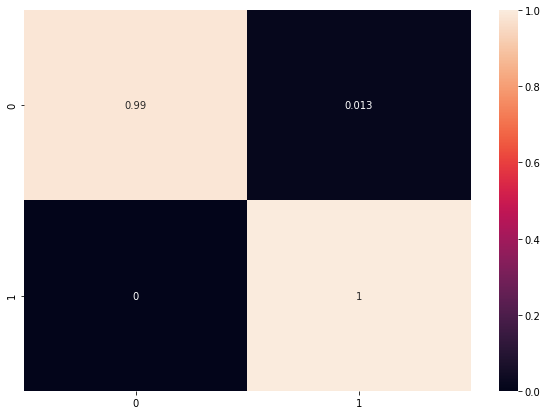

In [116]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adam
Acuracy 0.991418008978083
P,R,F1: (0.9872997264556467, 0.9936023622047244, 0.9903487617681501, None)
Wall time: 11.8 s


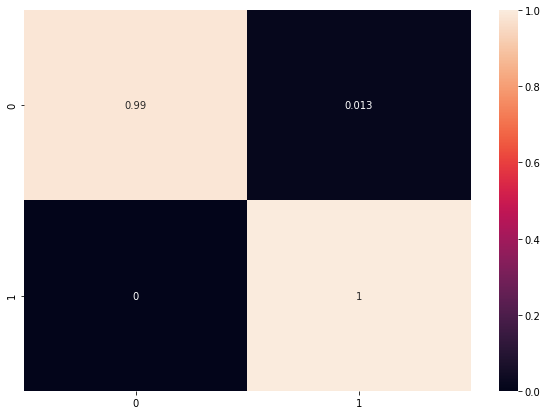

In [117]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adagrad
Acuracy 0.9891734882492739
P,R,F1: (0.9839026305457401, 0.9919749461734195, 0.987774644720075, None)
Wall time: 14.8 s


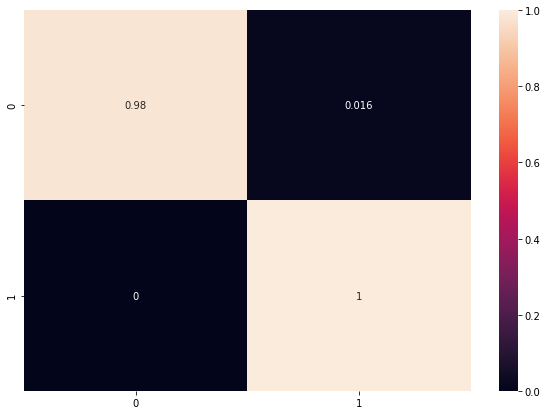

In [118]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

# Linear SVM Test

Linear SVM VGG16 Adam
Acuracy 0.9940586216002113
P,R,F1: (0.9909237595804761, 0.9956225680933852, 0.9932219744213706, None)
Wall time: 1min 9s


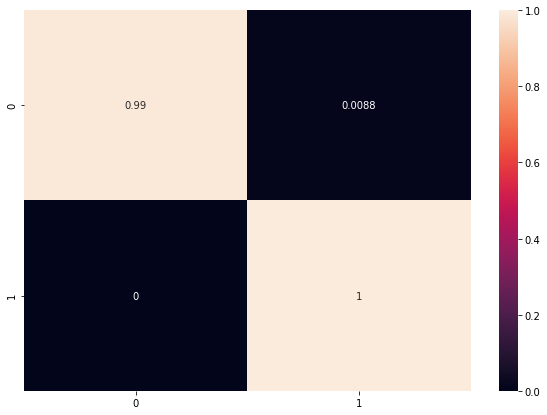

In [140]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

Linear SVM VGG16 RMSprop
Acuracy 0.9908898864536573
P,R,F1: (0.986024868963979, 0.9932403827179825, 0.9895169329377254, None)
Wall time: 30.5 s


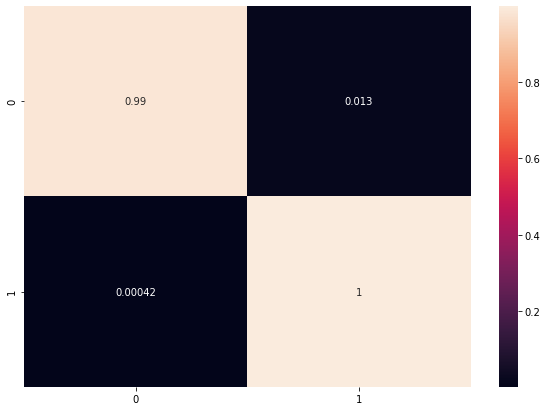

In [141]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Linear SVM InceptionV3 Adam
Acuracy 0.9273831528914708
P,R,F1: (0.9100130890052356, 0.9457379636937648, 0.9218696839519276, None)
Wall time: 6min 21s


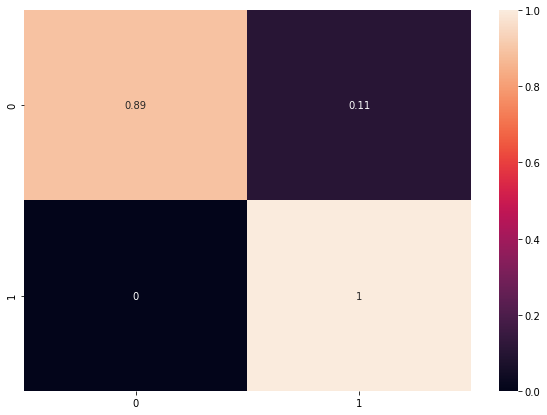

In [142]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Linear SVM InceptionV3 Adagrad
Acuracy 0.9900977026670188
P,R,F1: (0.9857032303719259, 0.9923015276560654, 0.9888880140491652, None)
Wall time: 20.9 s


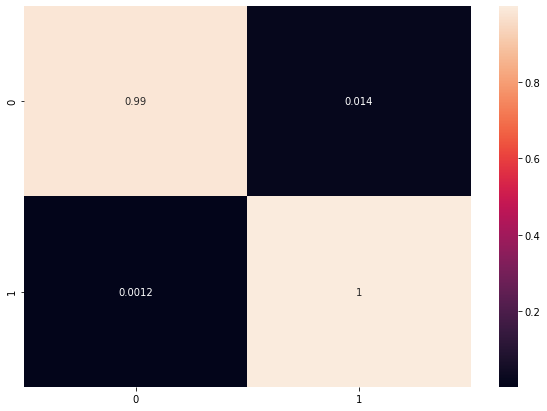

In [143]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

# RBF SVM Test

RBF SVM VGG16 Adam
Acuracy 0.9353049907578558
P,R,F1: (0.9361625420641575, 0.9146705175830852, 0.9242806698318434, None)
Wall time: 1min 15s


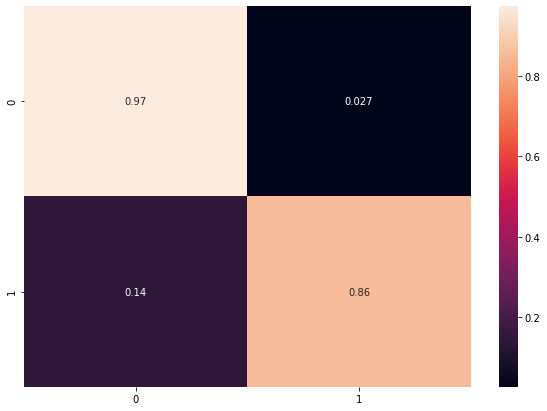

In [144]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

RBF SVM VGG16 RMSprop
Acuracy 0.9598626881436493
P,R,F1: (0.9558529506228586, 0.9534589262212847, 0.9546400734302148, None)
Wall time: 57.7 s


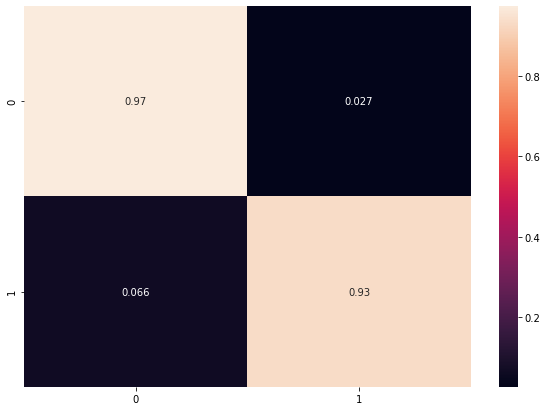

In [145]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

RBF SVM InceptionV3 Adam
Acuracy 0.8963559545814629
P,R,F1: (0.879027115979613, 0.8945955497666818, 0.8857769444900876, None)
Wall time: 1min 32s


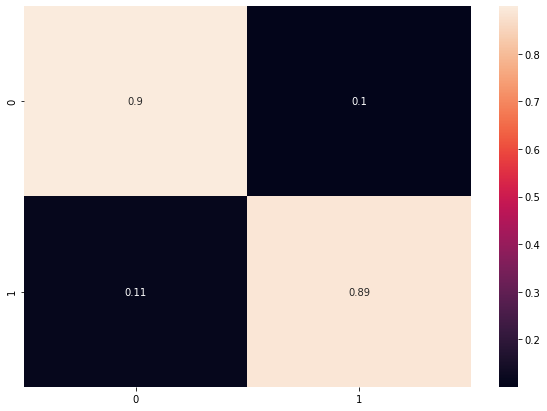

In [146]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

RBF SVM InceptionV3 Adagrad
Acuracy 0.9922101927647214
P,R,F1: (0.988279698053238, 0.994233776387803, 0.991170518867808, None)
Wall time: 31.5 s


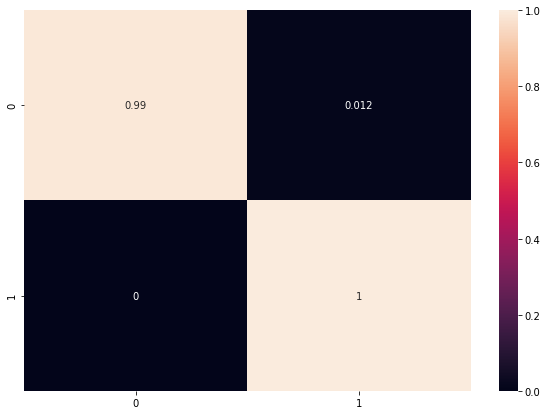

In [147]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

# Sigmoid SVM Test

Sigmoid SVM VGG16 Adam
Acuracy 0.5017163982043834
P,R,F1: (0.4322072567387031, 0.4349816403429043, 0.43327954061350354, None)
Wall time: 1min 21s


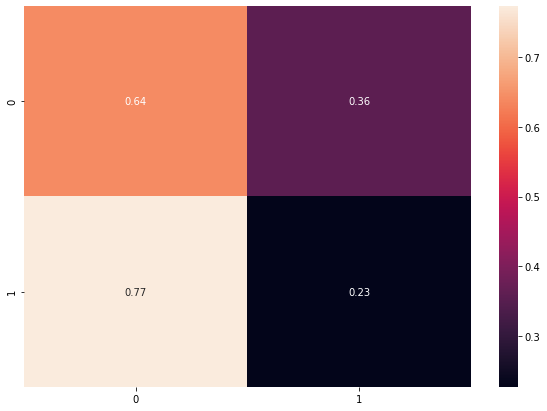

In [148]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM VGG16 RMSprop
Acuracy 0.5591497227356746
P,R,F1: (0.4982639500729814, 0.4982874260938116, 0.49823399880419406, None)
Wall time: 1min 16s


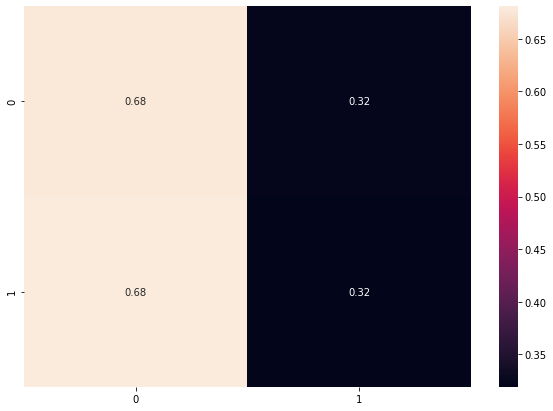

In [149]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Sigmoid SVM InceptionV3 Adam
Acuracy 0.6680749933984684
P,R,F1: (0.6267811117979932, 0.6248150769841537, 0.6257155736229697, None)
Wall time: 1min 3s


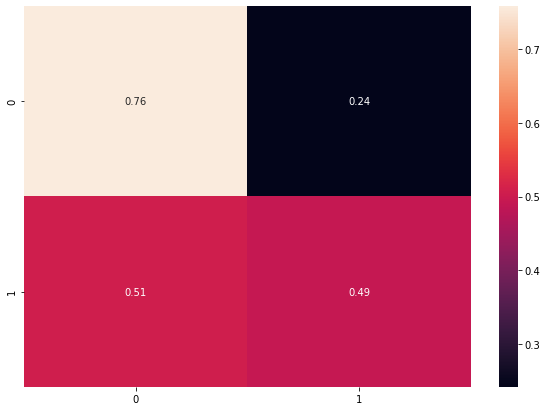

In [150]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM InceptionV3 Adagrad
Acuracy 0.9222339582783206
P,R,F1: (0.9101741502464553, 0.9139498628877583, 0.9120169320258603, None)
Wall time: 30.6 s


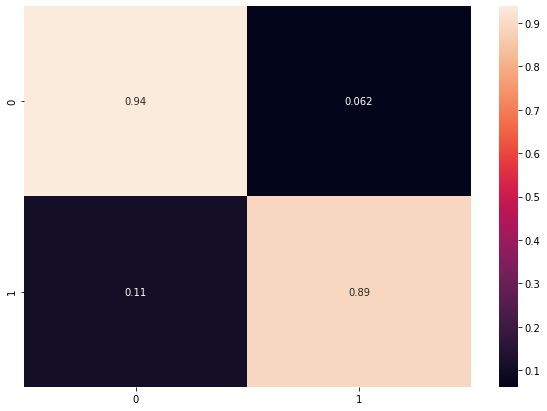

In [151]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

# Poly SVM Test

POLY SVM VGG16 Adam
Acuracy 0.8624240823871138
P,R,F1: (0.8977022524266887, 0.7962779970516904, 0.824081041090736, None)
Wall time: 1min 5s


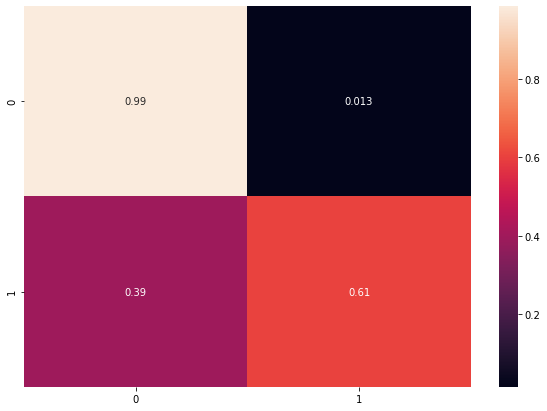

In [157]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('VGG16','Adam', X_train, y_train, X_test, y_test)

POLY SVM VGG16 RMSprop
Acuracy 0.8678373382624769
P,R,F1: (0.9040413729854724, 0.8060706475374151, 0.8333626646468612, None)
Wall time: 59.1 s


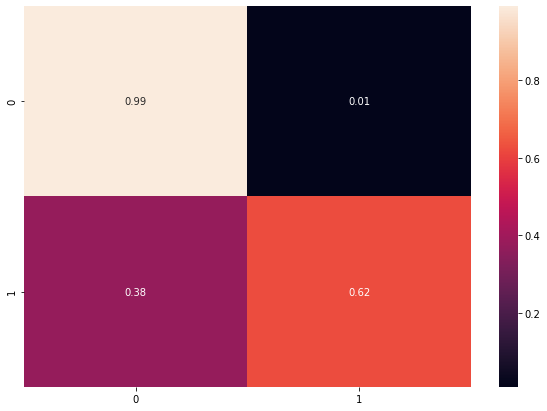

In [158]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

POLY SVM InceptionV3 Adam
Acuracy 0.908106680749934
P,R,F1: (0.890783297186488, 0.9076383565577295, 0.8981137125483377, None)
Wall time: 1min 14s


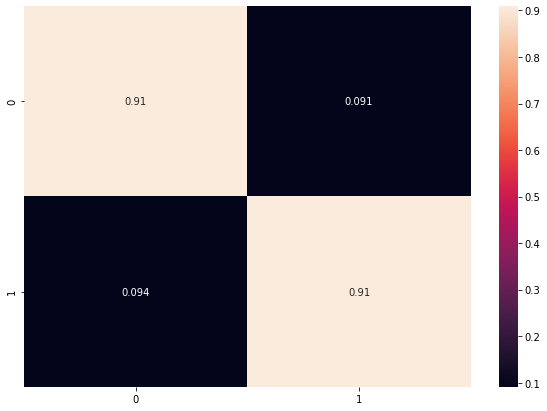

In [159]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

POLY SVM InceptionV3 Adagrad
Acuracy 0.9927383152891471
P,R,F1: (0.9892912772585669, 0.9945662912467892, 0.9918559819647254, None)
Wall time: 23 s


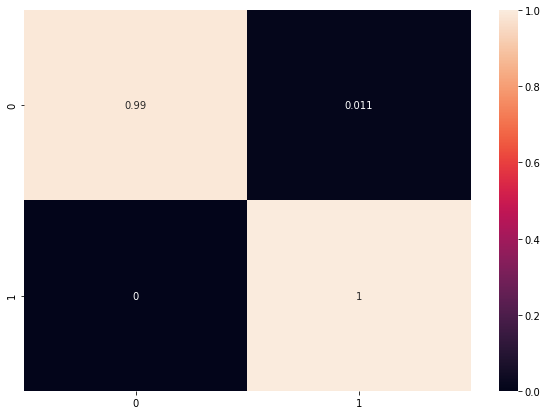

In [160]:
%%time
data = pd.read_csv('./sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)